## Clustering jerárquico y dendogramas
Notaciones
* X dataset(array n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las úniones
* K número de clusters


In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

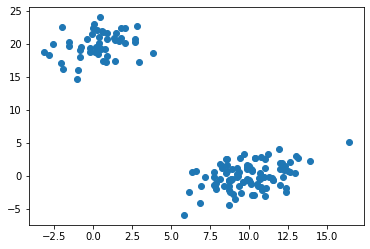

In [3]:
## determinamos la semilla
from numpy import size


np.random.seed(4711)
## creamos números aleatorios de una distribución multivariate normal
#multivariate_normal, es para crear datos distribuidos para en n dimensiones en este caso sería
# en tres dimensiones, el primer caso es una desviacion multivariada, con 
## desviacion mutivariante, esta en torno al punto 10 con una desviacion de entre el punto 3 puntos
# en el eje x, y 4 en el eje y 
a=np.random.multivariate_normal([10,0],[[3,1],[1,4]], size=[100,])
b=np.random.multivariate_normal([0,20], [[3,1],[1,4]], size=[50,])
X=np.concatenate((a,b))
plt.scatter(X[:, 0], X[:,1])

In [4]:
## creamos los clusters con el metodo ward
Z=linkage(X, "ward")

In [5]:
# importamos una librería para poder normalizar los datos
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [6]:
## pasamos la matriz de enlace y la matriz original de los datos
## es para la normalizacion de datos
c, coph_dist=cophenet(Z, pdist(X))
## un 98% de conservación de las distancias originales
c

0.9800148387574268

In [7]:
len(Z)

149

In [8]:
#Z contiene las posiciones de los cluster, cuando sale la posición excediendo el tamaño significa
# que está usando un dataset creado nuevo
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [9]:
pr=Z[:5]

In [10]:
pr[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [11]:
len(X), len(Z), Z.shape

(150, 149, (149, 4))

In [12]:
Z[152-len(X)]

array([33.        , 68.        ,  0.07106779,  2.        ])

In [13]:
Z[[33,68,62]]

array([[ 90.        , 181.        ,   0.33976372,   3.        ],
       [159.        , 193.        ,   0.67664987,   6.        ],
       [116.        , 136.        ,   0.59150595,   2.        ]])

In [14]:
Z[[33,62,68]]

array([[ 90.        , 181.        ,   0.33976372,   3.        ],
       [116.        , 136.        ,   0.59150595,   2.        ],
       [159.        , 193.        ,   0.67664987,   6.        ]])

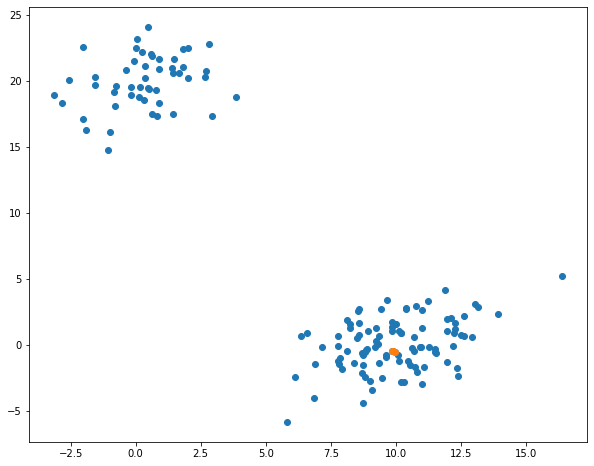

In [15]:
idx=[33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idx, 0], X[idx, 1]) 

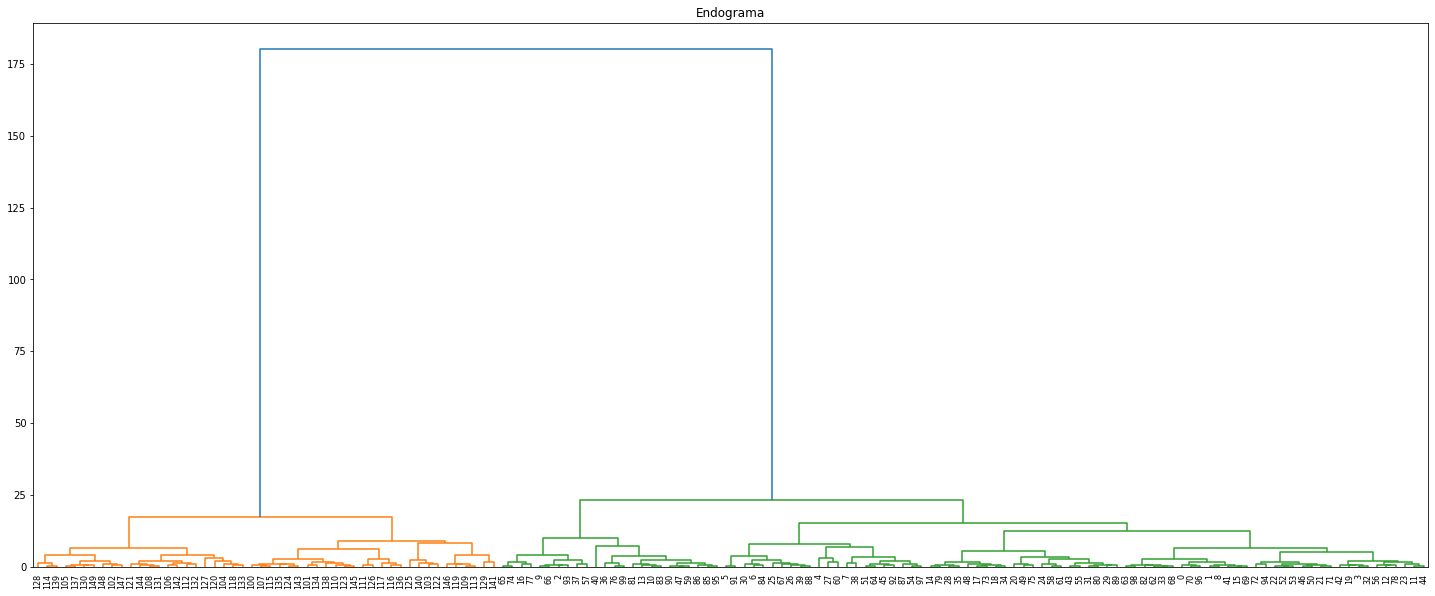

In [16]:
## endograama
plt.figure(figsize=(25,10))
plt.title("Endograma")
dendrogram(Z, leaf_font_size=8.0)
plt.show()

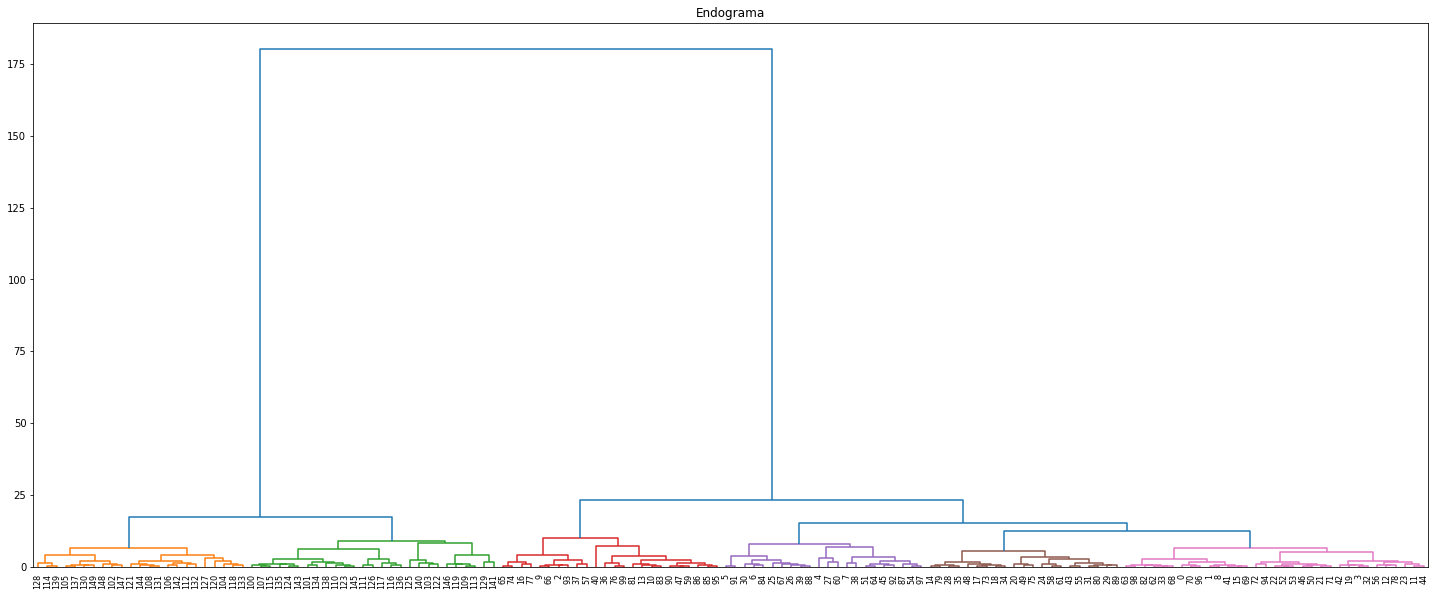

In [17]:
## endograama
plt.figure(figsize=(25,10))
plt.title("Endograma")
## crear clusters por defecto es el 70% de la distancia global, ocuparemos el 10% para pintar diferentes clusters
dendrogram(Z, leaf_font_size=8.0, color_threshold=10)
plt.show()

In [18]:
## Endograma la linéa entre más alta se encuentre es por que tardo demasiado en unir los clusters
## por lo tanto el ultimo se encuentra a 175 unión de clusters

In [19]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

## Truncar el dendograma


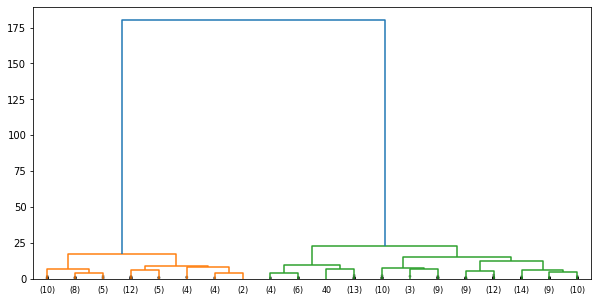

In [20]:
plt.figure(figsize=(10, 5))
## truncar el endograma a los ultimos 10
dendrogram(Z, leaf_font_size=8, truncate_mode="lastp", p=20, show_leaf_counts=True, show_contracted=True)
plt.show()

## Dendograma tuneado

[25.0, 25.0, 35.0, 35.0]
[0.0, 8.049352823485103, 8.049352823485103, 0.0]
[15.0, 15.0, 30.0, 30.0]
[0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103]
[5.0, 5.0, 22.5, 22.5]
[0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588]
[55.0, 55.0, 65.0, 65.0]
[0.0, 7.11106083424195, 7.11106083424195, 0.0]
[45.0, 45.0, 60.0, 60.0]
[0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195]
[85.0, 85.0, 95.0, 95.0]
[0.0, 6.65621608856717, 6.65621608856717, 0.0]
[75.0, 75.0, 90.0, 90.0]
[0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717]
[105.0, 105.0, 115.0, 115.0]
[0.0, 12.42734657224792, 12.42734657224792, 0.0]
[82.5, 82.5, 110.0, 110.0]
[7.868785423127422, 15.115331182663091, 15.115331182663091, 12.42734657224792]
[52.5, 52.5, 96.25, 96.25]
[9.844278294486319, 23.121989355286757, 23.121989355286757, 15.115331182663091]
[13.75, 13.75, 74.375, 74.375]
[17.11527361712349, 180.27043021047612, 180.27043021047612, 23.121989355286757]


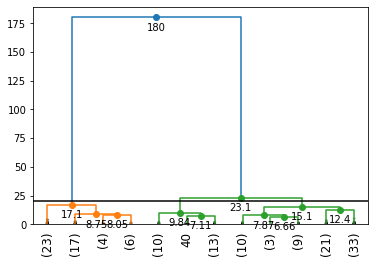

In [21]:
def dendrogram_tune(*args, **wargs):
    max_d=wargs.pop("max_d", None)
    annotate_above = wargs.pop('annotate_above', 0)
    dibujo=dendrogram(*args, **wargs)
    for i, d, c in zip(dibujo["icoord"], dibujo["dcoord"], dibujo["color_list"]):
        print(i)
        x=sum(i[1:3])/2
        print(d)
        y=d[1]
        plt.plot(x, y, "o", c=c)
        plt.annotate("%.3g"%y, (x,y), xytext=(0,-5), textcoords="offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c="k")
dendrogram_tune(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20)

In [22]:
c={"b":2}

In [23]:
c.get("a", 5)

5

In [24]:
from scipy.cluster.hierarchy import inconsistent

In [25]:
depth=3
incons= inconsistent(Z, depth)
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


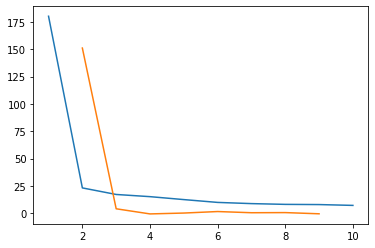

El número óptimo de cluster es 2


In [26]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last, 2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [27]:
## obtenemos los óltimos 10 registros
ultimos=Z[-10:]
ultimos
## nos quedamos con las distancias de los clusters
distancias=ultimos[:,2]
distancias, ultimos

(array([  7.11106083,   7.86878542,   8.04935282,   8.74822275,
          9.84427829,  12.42734657,  15.11533118,  17.11527362,
         23.12198936, 180.27043021]),
 array([[ 40.        , 278.        ,   7.11106083,  14.        ],
        [277.        , 288.        ,   7.86878542,  22.        ],
        [266.        , 280.        ,   8.04935282,  10.        ],
        [285.        , 291.        ,   8.74822275,  27.        ],
        [282.        , 289.        ,   9.84427829,  24.        ],
        [284.        , 286.        ,  12.42734657,  54.        ],
        [290.        , 294.        ,  15.11533118,  76.        ],
        [287.        , 292.        ,  17.11527362,  50.        ],
        [293.        , 295.        ,  23.12198936, 100.        ],
        [296.        , 297.        , 180.27043021, 150.        ]]))

In [28]:
## giramos las distancias, lo que especificamos es que el último pasa a ser le primero
distancias=distancias[::-1]

In [29]:
distancias

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

In [30]:
## creamos los indices de incremento en uno más uno por que el conteo comienza en 1
idx=np.arange(1, len(distancias)+1)
idx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


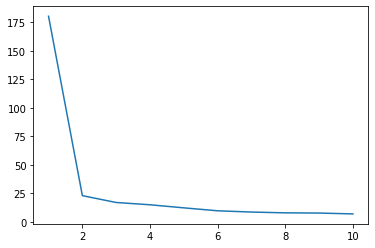

In [31]:
## dibujamos los datos de las distancias por cada una x que avanza
plt.plot(idx, distancias)
print(distancias)

In [32]:
## obtenemos la aceleración
acc=np.diff(distancias, 2)
## revertimos


In [33]:
acc_rev=acc

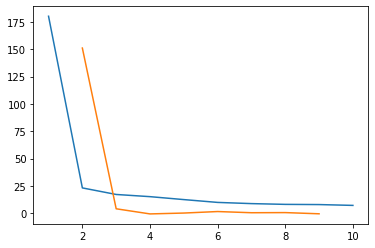

In [34]:
plt.plot(idx, distancias)
plt.plot(idx[:-2]+1, acc_rev)

In [35]:
## buscarmos el argumento máximo, +2 por el ajuste
acc_rev.argmax()+2

2

## conclución
* Vemos que el cambio drástico se efectúa en el segúndo cluster, por la grafica
> El número optimo es: 2

In [43]:
## creamos otros tres conjuntos
## multivariable normal con un punto medio de 40, 40 con una dispersion de 30 y 20
c=np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
## multivariate normal con un punto medio de 80,80 con una dispersión de 30 y 30
d=np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
## multivariate normal con un punto medio de 0,100 y una dispersion de 100 y 100
e=np.random.multivariate_normal([0,100], [[100,1],[1,100]], size=[200,])

In [49]:
## creamos un elemento con la suma de todos los arrays
X2=np.concatenate((X,c,d,e),)

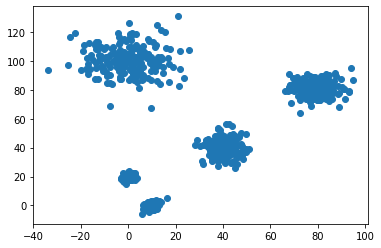

In [53]:
## pintamos los datos
## X[:,2], significa que del array tomaremos todos los elementos pero solo la segunda columna
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [54]:
## creamos los clusters
Z2=linkage(X2, "ward")

[15.0, 15.0, 25.0, 25.0]
[0.0, 180.27043021047612, 180.27043021047612, 0.0]
[5.0, 5.0, 20.0, 20.0]
[0.0, 618.0798518440344, 618.0798518440344, 180.27043021047612]
[35.0, 35.0, 45.0, 45.0]
[0.0, 88.85281806141997, 88.85281806141997, 0.0]
[65.0, 65.0, 75.0, 75.0]
[0.0, 134.18840662154741, 134.18840662154741, 0.0]
[55.0, 55.0, 70.0, 70.0]
[0.0, 156.68586213108904, 156.68586213108904, 134.18840662154741]
[40.0, 40.0, 62.5, 62.5]
[88.85281806141997, 1158.120073453099, 1158.120073453099, 156.68586213108904]
[12.5, 12.5, 51.25, 51.25]
[618.0798518440344, 1284.3113585283702, 1284.3113585283702, 1158.120073453099]


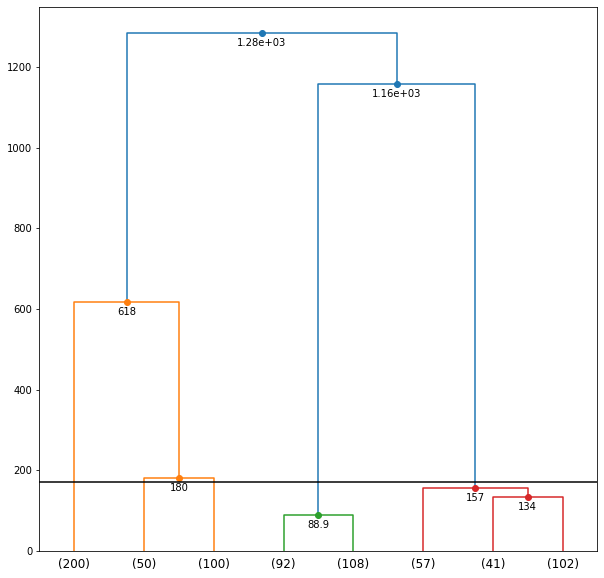

In [125]:
plt.figure(figsize=(10,10))
dendrogram_tune(Z2, truncate_mode="lastp",
p=8, max_d=170)
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [50.0, 50.0, 73.75, 73.75],
  [20.0, 20.0, 61.875, 61.875]],
 'dcoord': [[0.0, 77.78739139817945, 77.78739139817945, 0.0],
  [0.0, 180.27043021047612, 180.27043021047612, 0.0],
  [77.78739139817945,
   618.0798518440344,
   618.0798518440344,
   180.27043021047612],
  [0.0, 88.85281806141997, 88.85281806141997, 0.0],
  [0.0, 83.40244431325397, 83.40244431325397, 0.0],
  [0.0, 134.18840662154741, 134.18840662154741, 83.40244431325397],
  [0.0, 156.68586213108904, 156.68586213108904, 134.18840662154741],
  [88.85281806141997,
   1158.120073453099,
   1158.120073453099,
   156.68586213108904],
  [618.0798518440344,
   1284.3113585283702,
   1284.3113585283702,
   1158.120073453099]],
 'ivl': ['(118)',
  '(82)',
  '(50)',
  '(100)',
  '(92)',
  '(108)',
  '(57)',
  '(41)',
  '(30)',
  '(

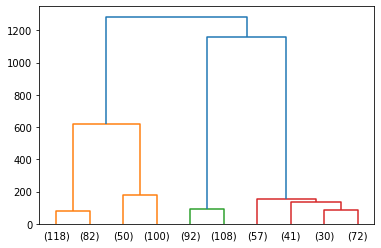

In [126]:
dendrogram(Z2, leaf_font_size=10, truncate_mode="lastp", p=10)

## Aplicar el método del codo


In [70]:
## obtenemos los últimos 10, solo la columna 2
ultimos=Z2[-10:, 2]
## revertimos
ultimos_revertidos=ultimos[::-1]

In [72]:
## creamos indices para el eje de las x, más 1 por que iniciamos en uno
idx=np.arange(1, len(ultimos)+1)

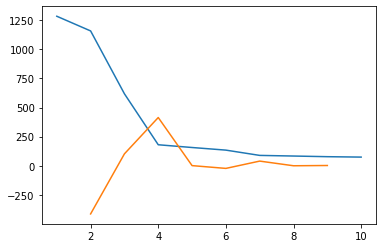

El número óptimo de clusters es 4


In [87]:
## pintamos la información
plt.plot(idx, ultimos_revertidos)
## aplicamos la primera derivada para obtener la velocidad
diferencias=np.diff(ultimos, 2)
## volteamos las diferencias
diferencias_revertidas=diferencias[::-1]
## el agoritmo de diff 2, solo puede ser del tamaño de array introducido -2
plt.plot(idx[:-2]+1, diferencias_revertidas)
plt.show()
## obtenemos el mejor número de clusters
## obtener la posicion del número mayor del array
k=diferencias_revertidas.argmax()+2
print("El número óptimo de clusters es %s"%k)

## conclusión
> la ralla naranja representa la velocidad cuando veemos un descenso, cuando en la raya azul se presencia un cambio de distancias

## Recuperar los clusters y sus elementos

In [88]:
from scipy.cluster.hierarchy import fcluster

In [89]:
type(Z)

numpy.ndarray

In [92]:
## cortar clusters de acuerdo a distancia, Z es el número de clusters creados, corte sabiendo a la
## altura a la cual quiero cortar el endograma
max_d=20
clusters=fcluster(Z, max_d, criterion="distance")

In [93]:
## nos dice cuantos datos pertenecen a cada cluster
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [105]:
## cortar de acuerdo al número de clusters
k=3
clusters=fcluster(Z2, k, criterion="maxclust")
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

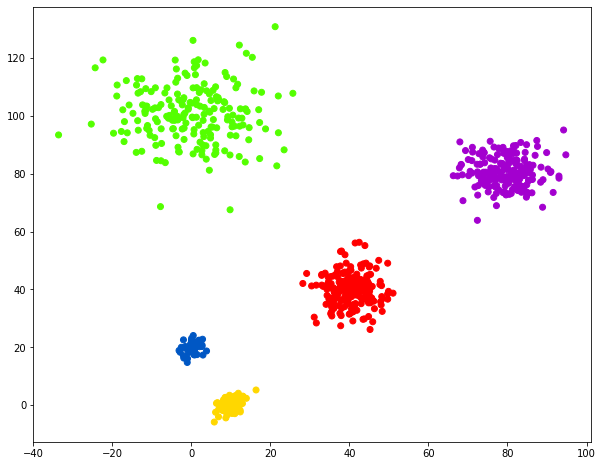

In [128]:
## division de clusters usando el número de clusters requeridos
k=5
clusters=fcluster(Z2, k, criterion="maxclust")
plt.figure(figsize=(10,8))
clusters
plt.scatter(X2[:, 0], X2[:,1], c=clusters, cmap="prism")
plt.show()

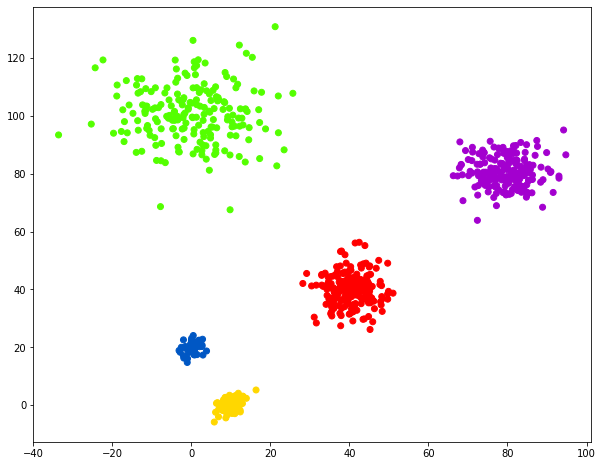

In [135]:
## division de clusters usando el número de distancia donde hacer el corte
distancia=180
clusters=fcluster(Z2, distancia, criterion="distance")
plt.figure(figsize=(10,8))
clusters
plt.scatter(X2[:, 0], X2[:,1], c=clusters, cmap="prism")
plt.show()

## conclución
>el número eficiente donde empieza el corte de clusters es el número 5, a pesar de que el método del codo nos arrajo 4, tambien la distancia para hacer el corte de grupos es en 170, deacuerdo al endograma